In [98]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [99]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_test.shape

(10000, 32, 32, 3)

In [100]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [101]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

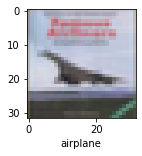

In [102]:
plot_sample(X_test, y_test, 3)

In [103]:
X_train = X_train / 255.0
X_test = X_test / 255.0

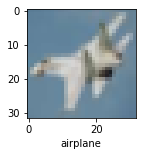

In [105]:
plot_sample(X_test, y_test, 10)

In [120]:
ann = models.Sequential([
                        layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='softmax')
      ])

ann.compile(optimizer='Adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.8885 - accuracy: 0.3296
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6540 - accuracy: 0.4074
Epoch 3/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5735 - accuracy: 0.4360
Epoch 4/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5224 - accuracy: 0.4540
Epoch 5/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.4846 - accuracy: 0.4675


In [121]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.5048 - accuracy: 0.4716


[1.5047861337661743, 0.4715999960899353]

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.54      1000
           1       0.58      0.60      0.59      1000
           2       0.34      0.33      0.34      1000
           3       0.31      0.30      0.30      1000
           4       0.42      0.39      0.41      1000
           5       0.36      0.47      0.40      1000
           6       0.51      0.53      0.52      1000
           7       0.50      0.56      0.53      1000
           8       0.65      0.53      0.59      1000
           9       0.50      0.53      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [107]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [108]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [109]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4800 - accuracy: 0.4687
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1224 - accuracy: 0.6059
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9936 - accuracy: 0.6536
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9121 - accuracy: 0.6827
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8536 - accuracy: 0.7035
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7972 - accuracy: 0.7206
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7524 - accuracy: 0.7378
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7086 - accuracy: 0.7534
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6654 - accuracy: 0.7678
Epoch 10/10
1563/1563 [==============================] - 57s 37m

In [110]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 2.2760 - accuracy: 0.1341


[2.2759644985198975, 0.13410000503063202]

In [119]:
y_test = y_test.reshape(-1,)

In [118]:
y_pred = cnn.predict(X_test)

In [117]:
y_classes = [np.argmax(element) for element in y_pred]

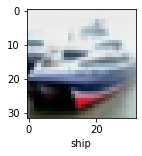

In [115]:
plot_sample (X_test, y_test,1)

In [116]:
classes[y_classes[1]]

'ship'